In [4]:
%matplotlib inline
import datetime
import calendar
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
# from skopt import BayesSearchCV
from scipy.stats import randint 
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [15]:
# Loading
dataset = pd.read_csv('nasa.csv')
dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,1995-01-01,788947200000,6.115834,22017.003799,0.419483,163.178711,62753692.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,yes
1,3723955,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,18.113985,65210.346095,0.383014,148.992630,57298148.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,no
2,2446862,2446862,20.3,0.231502,0.517654,1995-01-08,789552000000,7.590711,27326.560182,0.050956,19.821890,7622911.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,yes
3,3092506,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,11.173874,40225.948191,0.285322,110.990387,42683616.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,no
4,3514799,3514799,21.6,0.127220,0.284472,1995-01-15,790156800000,9.840831,35426.991794,0.407832,158.646713,61010824.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,yes


In [16]:
#Deleting unnessecary columns like ID's, unchanging values and passed dates
dataset.drop(['Neo Reference ID','Name','Close Approach Date','Epoch Date Close Approach',
               'Orbiting Body','Orbit Determination Date','Equinox'], axis=1, inplace=True)

In [17]:
# Change no, yes values to 0 and 1
dataset=dataset.replace(to_replace=['no', 'yes'], value=[0, 1])

In [18]:
#Check if nan values
dataset[dataset.isnull().any(axis=1)]
#Only 1 row with a nan value we can just drop this

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
1546,24.3,NaN,0.082043,6.915754,24896.714307,0.039889,15.516923,5967348.5,13,7,0.039049,4869,2458000.5,0.231348,1.332912,11.443782,177.858934,562.083545,1.024545,19.431219,1.641279,2.458161e+06,257.222041,0.640474,0


In [19]:
dataset.dropna(inplace=True)

In [20]:
dataset.describe()
# "Miss Dist.(kilometers)" looks a bit supicious, min and max values are very far apart.

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4686.000000,4686.000000
mean,678.266931,0.204640,0.457589,13.972317,50300.339848,0.256824,138.198644,4.996332e+07,28.303884,3.516219,0.082329,5056.151088,2.457724e+06,0.382601,1.400278,13.374256,172.156059,635.597761,0.813338,183.967256,1.987218,2.457728e+06,181.151697,0.738263,0.161118
std,3937.393092,0.369605,0.826461,7.293272,26255.780837,0.145779,2623.164517,1.310882e+08,38.303103,3.078214,0.090307,1237.947507,9.203868e+02,0.180450,0.524209,10.937357,103.287765,370.992760,0.242065,103.496175,0.951608,9.443060e+02,107.507352,0.342661,0.367679
min,-26.100000,0.001011,0.002260,0.335504,1207.814804,0.000178,0.069194,2.660989e+04,1.000000,0.000000,0.000002,2196.000000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,8.437212,30373.963274,0.133440,51.908257,2.063112e+07,9.000000,0.000000,0.014585,4049.250000,2.458000e+06,0.240935,1.000635,4.961828,83.081111,365.605031,0.630834,95.633231,1.266059,2.457815e+06,86.997048,0.453263,0.000000
50%,22.000000,0.110804,0.247765,12.921682,46518.055335,0.265155,103.145134,4.029665e+07,16.000000,3.000000,0.047379,5071.000000,2.458000e+06,0.372513,1.240929,10.304912,172.625393,504.915377,0.833104,189.767263,1.618175,2.457973e+06,185.435988,0.712991,0.000000
75%,24.600000,0.253837,0.567597,18.077871,65080.334830,0.384159,149.437649,5.811893e+07,31.000000,6.000000,0.123609,6019.000000,2.458000e+06,0.512437,1.678427,19.515849,255.100144,794.240628,0.997175,271.794410,2.451763,2.458108e+06,276.531946,0.984669,0.000000
max,29345.000000,15.579552,34.836938,44.633747,160681.487851,0.499884,179625.000000,2.079439e+09,611.000000,9.000000,0.477891,9025.000000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


<AxesSubplot:xlabel='Miss Dist.(kilometers)'>

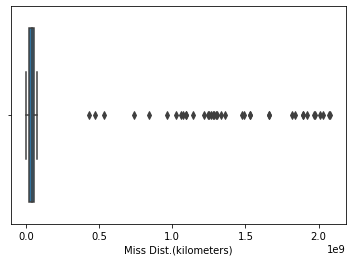

In [21]:
#lets check this on a boxplot
sns.boxplot(x="Miss Dist.(kilometers)",data=dataset)

<AxesSubplot:xlabel='Miss Dist.(kilometers)'>

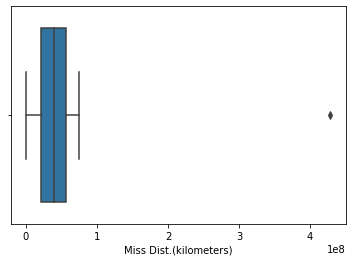

In [22]:
# Since we have some outliers we will erase them
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

#lets check again to see improvment
sns.boxplot(x="Miss Dist.(kilometers)",data=dataset)

<AxesSubplot:xlabel='Hazardous', ylabel='count'>

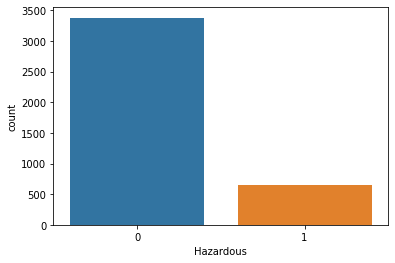

In [23]:
# Check dataset balancedness 
sns.countplot(x='Hazardous',data=dataset)

# Seems very unbalanced

In [33]:
# Split features and targets
X = dataset.drop(['Hazardous'], axis=1)
y= dataset['Hazardous'].values

# split test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Normalise the features.
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)
X_train=pd.DataFrame(X_train, columns=X.columns)
X_test=pd.DataFrame(X_test, columns=X.columns)

In [41]:
# Training random forest tree classifier
RFR_model = RandomForestClassifier(n_estimators=500,class_weight="balanced")
RFR_model.fit(X_train,y_train)

y_pred = RFR_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

#This already performs really good. This kind of model really seems to work with this data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       674
           1       0.99      0.99      0.99       133

    accuracy                           1.00       807
   macro avg       0.99      0.99      0.99       807
weighted avg       1.00      1.00      1.00       807

[[672   2]
 [  1 132]]
99.62825278810409


In [39]:
#Check top 10 features
importance = enumerate(RFR_model.feature_importances_)
importance = sorted(importance, key=lambda x:x[1],reverse=True)[:10]
place=1
top_n_features=[]
for i,v in importance:
    print(f"{place}) {X.columns.values[i]}, Feature: {i}, Score: {v}f")
    top_n_features.append(X.columns.values[i])
    place+=1

1) Minimum Orbit Intersection, Feature: 10, Score: 0.5449441581219168f
2) Orbit ID, Feature: 8, Score: 0.19991785362022538f
3) Est Dia in KM(max), Feature: 2, Score: 0.11167366490061023f
4) Absolute Magnitude, Feature: 0, Score: 0.0866824144754252f
5) Miss Dist.(kilometers), Feature: 7, Score: 0.018444587933457223f
6) Inclination, Feature: 15, Score: 0.01595070630625161f
7) Mean Anomaly, Feature: 22, Score: 0.005354011910643535f
8) Miss Dist.(lunar), Feature: 6, Score: 0.004251212850142574f
9) Semi Major Axis, Feature: 14, Score: 0.003913494123026351f
10) Eccentricity, Feature: 13, Score: 0.0019160058577826684f


In [42]:
# Let's see how model performs if we only keep the top 10 features
X_train.drop(X_train.columns.difference(top_n_features), 1, inplace=True)
X_test.drop(X_test.columns.difference(top_n_features), 1, inplace=True)
RFR_model = RandomForestClassifier(n_estimators=500)
RFR_model.fit(X_train,y_train)

y_pred = RFR_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

#It performs pretty much the same will going a bit faster

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       674
           1       0.98      0.99      0.99       133

    accuracy                           1.00       807
   macro avg       0.99      0.99      0.99       807
weighted avg       1.00      1.00      1.00       807

[[671   3]
 [  1 132]]
99.50433705080545


The model is perfect out of the box, but let's keep playing around and try some ensemble methods

In [115]:
# Boosting
# Adaboost
cart = SVC(probability=True,class_weight="balanced",C= 86.75682094910894,gamma= 20.11549289899892,kernel= 'poly')#Get this model by random search
logreg_adaboost = AdaBoostClassifier(base_estimator=cart,n_estimators=500) 
logreg_adaboost.fit(X_train,y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

#Adaboost seems to do a bit worse but still decent in this case
# This might be because of some noise in the data or overfitting by using a to weak learner

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       836
           1       0.89      0.85      0.87       164

    accuracy                           0.96      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.96      0.96      0.96      1000

[[819  17]
 [ 24 140]]
95.89999999999999


In [120]:
clf_gradientboost = GradientBoostingClassifier(n_estimators=500)

clf_gradientboost.fit(X_train,y_train)


y_pred = clf_gradientboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

#Gradienboost keeps the same results up as the orignal model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       0.98      0.99      0.99       164

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[833   3]
 [  1 163]]
99.6


In [12]:
# Stacking
#Got svc model by doing random search
estimators = [
    ('svc', SVC(probability=True,class_weight="balanced",C= 86.75682094910894,gamma= 20.11549289899892,kernel= 'poly')),
    ('nb' , GaussianNB()),
    ('rfc', RandomForestClassifier(n_estimators = 500,class_weight="balanced"))
]
    
lr = LogisticRegression()  
    
stacked_model = StackingClassifier(
estimators=estimators, final_estimator=lr,cv=20,n_jobs=7)    
    
stacked_model.fit(X_train,y_train)


y_pred = stacked_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 
#Stacking also gives similair results to the original model. (better wasn't really possible)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       0.98      0.99      0.99       164

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[833   3]
 [  1 163]]
99.6
